In [1]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
traindata=pd.read_csv("train.csv")

In [3]:
traindata.head()

,id,location,fault_severity
0,14121,location 118,1
1,9320,location 91,0
2,14394,location 152,1
3,8218,location 931,1
4,14804,location 120,0


In [4]:
traindata.isnull().sum()

id                0
location          0
fault_severity    0
dtype: int64

In [5]:
traindata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7381 entries, 0 to 7380
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              7381 non-null   int64 
 1   location        7381 non-null   object
 2   fault_severity  7381 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 173.1+ KB


In [6]:
eventdata=pd.read_csv("event_type.csv")

In [7]:
eventdata.head()

,id,event_type
0,6597,event_type 11
1,8011,event_type 15
2,2597,event_type 15
3,5022,event_type 15
4,5022,event_type 11


In [8]:
eventdata.isnull().sum()

id            0
event_type    0
dtype: int64

In [9]:
eventdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31170 entries, 0 to 31169
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          31170 non-null  int64 
 1   event_type  31170 non-null  object
dtypes: int64(1), object(1)
memory usage: 487.2+ KB


In [10]:
logdata=pd.read_csv("log_feature.csv")

In [11]:
logdata.head()

,id,log_feature,volume
0,6597,feature 68,6
1,8011,feature 68,7
2,2597,feature 68,1
3,5022,feature 172,2
4,5022,feature 56,1


In [12]:
logdata.isnull().sum()

id             0
log_feature    0
volume         0
dtype: int64

In [13]:
logdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58671 entries, 0 to 58670
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           58671 non-null  int64 
 1   log_feature  58671 non-null  object
 2   volume       58671 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.3+ MB


In [14]:
resourcedata=pd.read_csv("resource_type.csv")

In [15]:
resourcedata.head()

,id,resource_type
0,6597,resource_type 8
1,8011,resource_type 8
2,2597,resource_type 8
3,5022,resource_type 8
4,6852,resource_type 8


In [16]:
resourcedata.isnull().sum()

id               0
resource_type    0
dtype: int64

In [17]:
resourcedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21076 entries, 0 to 21075
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             21076 non-null  int64 
 1   resource_type  21076 non-null  object
dtypes: int64(1), object(1)
memory usage: 329.4+ KB


In [18]:
severitydata=pd.read_csv("severity_type.csv")

In [19]:
severitydata.head()

,id,severity_type
0,6597,severity_type 2
1,8011,severity_type 2
2,2597,severity_type 2
3,5022,severity_type 1
4,6852,severity_type 1


In [20]:
severitydata.isnull().sum()

id               0
severity_type    0
dtype: int64

In [21]:
severitydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18552 entries, 0 to 18551
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             18552 non-null  int64 
 1   severity_type  18552 non-null  object
dtypes: int64(1), object(1)
memory usage: 290.0+ KB


In [22]:
traindata.shape,eventdata.shape,logdata.shape,resourcedata.shape,severitydata.shape

((7381, 3), (31170, 2), (58671, 3), (21076, 2), (18552, 2))

In [23]:
train_1 = traindata.merge(severitydata, how = 'left', left_on='id', right_on='id')
train_2 = train_1.merge(resourcedata, how = 'left', left_on='id', right_on='id')
train_3 = train_2.merge(logdata, how = 'left', left_on='id', right_on='id')
train_4 = train_3.merge(eventdata, how = 'left', left_on='id', right_on='id')

In [24]:
train_4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61839 entries, 0 to 61838
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              61839 non-null  int64 
 1   location        61839 non-null  object
 2   fault_severity  61839 non-null  int64 
 3   severity_type   61839 non-null  object
 4   resource_type   61839 non-null  object
 5   log_feature     61839 non-null  object
 6   volume          61839 non-null  int64 
 7   event_type      61839 non-null  object
dtypes: int64(3), object(5)
memory usage: 4.2+ MB


In [25]:
train_4.head()

,id,location,fault_severity,severity_type,resource_type,log_feature,volume,event_type
0,14121,location 118,1,severity_type 2,resource_type 2,feature 312,19,event_type 34
1,14121,location 118,1,severity_type 2,resource_type 2,feature 312,19,event_type 35
2,14121,location 118,1,severity_type 2,resource_type 2,feature 232,19,event_type 34
3,14121,location 118,1,severity_type 2,resource_type 2,feature 232,19,event_type 35
4,9320,location 91,0,severity_type 2,resource_type 2,feature 315,200,event_type 34


C:\Users\skurt\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


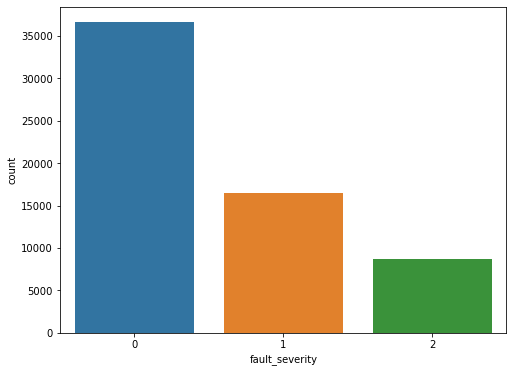

In [26]:
plt.figure(figsize = (8,6))
sns.countplot(train_4['fault_severity'])
plt.show()

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X = train_4[['id', 'location', 'severity_type', 'resource_type',
       'log_feature', 'volume', 'event_type']]
y = train_4.fault_severity

In [33]:
X=pd.get_dummies(X,drop_first=True)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [38]:
X.head()

,id,volume,location_location 10,location_location 100,location_location 1000,location_location 1002,location_location 1005,location_location 1006,location_location 1007,location_location 1008,...,event_type_event_type 49,event_type_event_type 5,event_type_event_type 50,event_type_event_type 51,event_type_event_type 53,event_type_event_type 54,event_type_event_type 6,event_type_event_type 7,event_type_event_type 8,event_type_event_type 9
0,14121,19,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,14121,19,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,14121,19,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,14121,19,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9320,200,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
y.head()

0    1
1    1
2    1
3    1
4    0
Name: fault_severity, dtype: int64

In [34]:
X.head()

,id,volume,location_location 10,location_location 100,location_location 1000,location_location 1002,location_location 1005,location_location 1006,location_location 1007,location_location 1008,...,event_type_event_type 49,event_type_event_type 5,event_type_event_type 50,event_type_event_type 51,event_type_event_type 53,event_type_event_type 54,event_type_event_type 6,event_type_event_type 7,event_type_event_type 8,event_type_event_type 9
0,14121,19,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,14121,19,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,14121,19,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,14121,19,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9320,200,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49471 entries, 41238 to 56422
Columns: 1321 entries, id to event_type_event_type 9
dtypes: int64(2), uint8(1319)
memory usage: 63.4 MB


In [62]:
y_train.shape

(49471,)

In [98]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
from sklearn.ensemble import RandomForestClassifier
r=RandomForestClassifier()
from sklearn.tree import DecisionTreeClassifier
d=DecisionTreeClassifier()
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()
from sklearn.neighbors import KNeighborsClassifier
k=KNeighborsClassifier()


In [83]:
log=LogisticRegression()
regmodel=log.fit(X_train,y_train)

In [84]:
y_pretest=log.predict(X_test)
y_pretest

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [86]:
r2_score(y_test,y_pretest)

-0.2968504089400561

In [69]:
r=RandomForestClassifier()
regmodel=r.fit(X_train,y_train)

In [70]:
y_pretest=r.predict(X_test)
y_pretest

array([1, 1, 0, ..., 0, 0, 2], dtype=int64)

In [71]:
r2_score(y_test,y_pretest)

0.5153980383111061

In [72]:
d=DecisionTreeClassifier()
regmodel=d.fit(X_train,y_train)

In [73]:
y_pretest=d.predict(X_test)
y_pretest

array([1, 1, 1, ..., 0, 0, 1], dtype=int64)

In [74]:
r2_score(y_test,y_pretest)

0.827148344875299

In [93]:
gbc=GradientBoostingClassifier()
regmodel=gbc.fit(X_train,y_train)

In [94]:
y_pretest=gbc.predict(X_test)
y_pretest

array([0, 1, 0, ..., 0, 0, 2], dtype=int64)

In [95]:
r2_score(y_test,y_pretest)

0.13049444198878069

In [96]:
print('Classification report \n')
print(metrics.classification_report(y_test,y_pretest))

Classification report 

              precision    recall  f1-score   support

           0       0.73      0.95      0.82      7362
           1       0.76      0.36      0.49      3301
           2       0.79      0.52      0.63      1705

    accuracy                           0.74     12368
   macro avg       0.76      0.61      0.65     12368
weighted avg       0.74      0.74      0.71     12368



In [79]:
k=KNeighborsClassifier()
regmodel=k.fit(X_train,y_train)

In [81]:
y_pretest=k.predict(X_test)
y_pretest

array([1, 1, 0, ..., 0, 0, 1], dtype=int64)

In [82]:
r2_score(y_test,y_pretest)

0.6779094604953115

In [88]:
from sklearn import metrics

In [89]:
print('Classification report \n')
print(metrics.classification_report(y_test,y_pretest))

Classification report 

              precision    recall  f1-score   support

           0       0.66      0.83      0.73      7362
           1       0.40      0.36      0.38      3301
           2       0.42      0.03      0.05      1705

    accuracy                           0.59     12368
   macro avg       0.49      0.41      0.39     12368
weighted avg       0.56      0.59      0.54     12368

